In [45]:
#Import the data Analysis and Visualization Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the dataset

df = pd.read_csv('Fake Postings.csv')

#Display the first 5 values of the dataset to have an overview on the overal data

df.head().T


,0,1,2,3,4
title,Mental health nurse,Conference centre manager,"Engineer, land",Forest/woodland manager,"Production designer, theatre/television/film"
description,Arm drive court sure vote. Earn $5000/week! Im...,Government whom its bed go tax tree black. Ear...,I member discuss follow way there nation. Earn...,House across wait approach face. Earn $5000/we...,Case best environmental full finally leader me...
requirements,"Basic knowledge in live, no degree required. F...","Basic knowledge in seek, no degree required. F...","Basic knowledge in worker, no degree required....","Basic knowledge in example, no degree required...","Basic knowledge in smile, no degree required. ..."
company_profile,Rivera and Sons - Established 2022.,"Davidson, Jones and Gomez - Established 2003.",Allen Ltd - Established 1998.,Forbes Ltd - Established 1990.,"Jennings, Martin and Sanchez - Established 1975."
location,West Jeffrey,Lake Meredithberg,Lake Cathybury,South Matthewstad,East Rhondafurt
salary_range,$55016-$100476,$53438-$93138,$45584-$105229,$66188-$139621,$32183-$115012
employment_type,Internship,Part-Time,Part-Time,Full-Time,Temporary
industry,IT,Finance,IT,Education,Retail
benefits,Free meals,Flexible hours,Free travel,Free travel,Flexible hours
fraudulent,1,1,1,1,1


In [46]:
# Data Cleaning
# We shall Inspect and clean the collected data to address missing values, outliers, and inconsistencies.

Checking for the information of our data to identify any missing values

Columns Overview:

title: Job title.

description: Detailed job description.

requirements: Qualifications or skills needed.

company_profile: Information about the company.

location: Job location.

salary_range: Expected salary range.

employment_type: Type of employment (e.g., Full-Time, Internship).

industry: Industry category (e.g., IT, Finance).

benefits: Perks offered with the job.

fraudulent: Target variable (1 = Fake job posting, 0 = Real).

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            10000 non-null  object
 1   description      10000 non-null  object
 2   requirements     10000 non-null  object
 3   company_profile  10000 non-null  object
 4   location         10000 non-null  object
 5   salary_range     10000 non-null  object
 6   employment_type  10000 non-null  object
 7   industry         10000 non-null  object
 8   benefits         10000 non-null  object
 9   fraudulent       10000 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


In [48]:
#Cheching for \Missing Values

df.isnull().sum()

title              0
description        0
requirements       0
company_profile    0
location           0
salary_range       0
employment_type    0
industry           0
benefits           0
fraudulent         0
dtype: int64

Initial Observarions

Data Completeness: 
All columns have non-null values, indicating no missing data at the column level.

Column Types: 
Most are categorical or text, with one numeric target column (fraudulent).


Potential Issues:
Text-heavy fields like description, requirements, and company_profile require processing (e.g., tokenization, vectorization).


The salary_range is a string with ranges, requiring parsing.

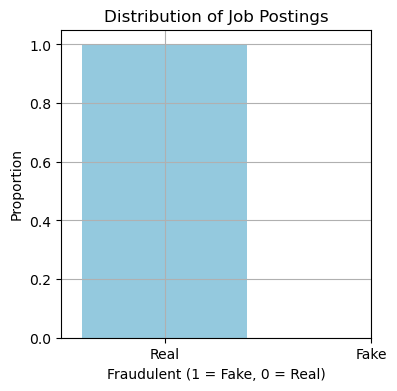

fraudulent
1    1.0
Name: proportion, dtype: float64

In [49]:
#Our target valriable will be the the fraudulent column
#Summarize it 

# Distribution of the fraudulent jobs columns. 
# The column has been represented by one constant value 1, representing fraudulent jobs
fraudulent_distribution = df['fraudulent'].value_counts(normalize=True)

# Plot the distribution of the frauduelent posts
plt.figure(figsize=(4, 4))
sns.barplot(x=fraudulent_distribution.index, y=fraudulent_distribution.values, color='skyblue')
plt.title("Distribution of Job Postings")
plt.xlabel("Fraudulent (1 = Fake, 0 = Real)")
plt.ylabel("Proportion")
plt.grid(True)
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

fraudulent_distribution

The dataset shows that 100% of the job postings are marked as fraudulent. This suggests an issue with class diversity, as we lack examples of real postings for comparison or training. This imbalance could hinder model-building efforts and require either:


We shall go ahead and simulate synthetic examples of real postings for comparison to address the imbalance

In [50]:
# Getting two extra columns by Splitting the salary_range column into numerical values and assign to the columns lower_sal and upper_sal
df[['lower_sal', 'upper_sal']] = (
    df['salary_range']
    .str.extract(r'\$(\d+)-\$(\d+)')  # Extract numbers using regex, regular expression
    .astype(float)  # Convert the split values into float
)

df.head().T

,0,1,2,3,4
title,Mental health nurse,Conference centre manager,"Engineer, land",Forest/woodland manager,"Production designer, theatre/television/film"
description,Arm drive court sure vote. Earn $5000/week! Im...,Government whom its bed go tax tree black. Ear...,I member discuss follow way there nation. Earn...,House across wait approach face. Earn $5000/we...,Case best environmental full finally leader me...
requirements,"Basic knowledge in live, no degree required. F...","Basic knowledge in seek, no degree required. F...","Basic knowledge in worker, no degree required....","Basic knowledge in example, no degree required...","Basic knowledge in smile, no degree required. ..."
company_profile,Rivera and Sons - Established 2022.,"Davidson, Jones and Gomez - Established 2003.",Allen Ltd - Established 1998.,Forbes Ltd - Established 1990.,"Jennings, Martin and Sanchez - Established 1975."
location,West Jeffrey,Lake Meredithberg,Lake Cathybury,South Matthewstad,East Rhondafurt
salary_range,$55016-$100476,$53438-$93138,$45584-$105229,$66188-$139621,$32183-$115012
employment_type,Internship,Part-Time,Part-Time,Full-Time,Temporary
industry,IT,Finance,IT,Education,Retail
benefits,Free meals,Flexible hours,Free travel,Free travel,Flexible hours
fraudulent,1,1,1,1,1


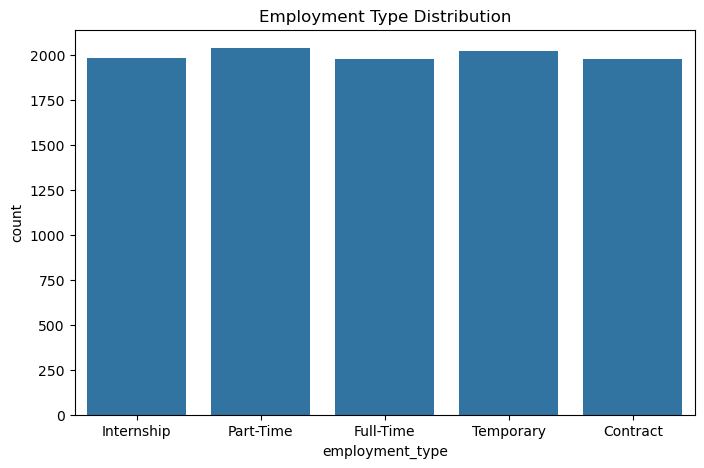

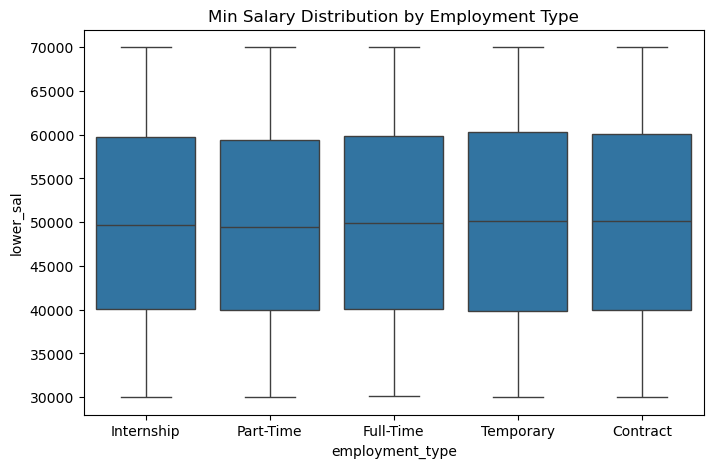

In [51]:

# Distribution of features(e.g., employment_type)
plt.figure(figsize=(8, 5))
sns.countplot(df, x='employment_type')
plt.title("Employment Type Distribution")
plt.show()

# Boxplot for salary vs employment_type
plt.figure(figsize=(8, 5))
sns.boxplot(df, x='employment_type', y='lower_sal')
plt.title("Min Salary Distribution by Employment Type")
plt.show()

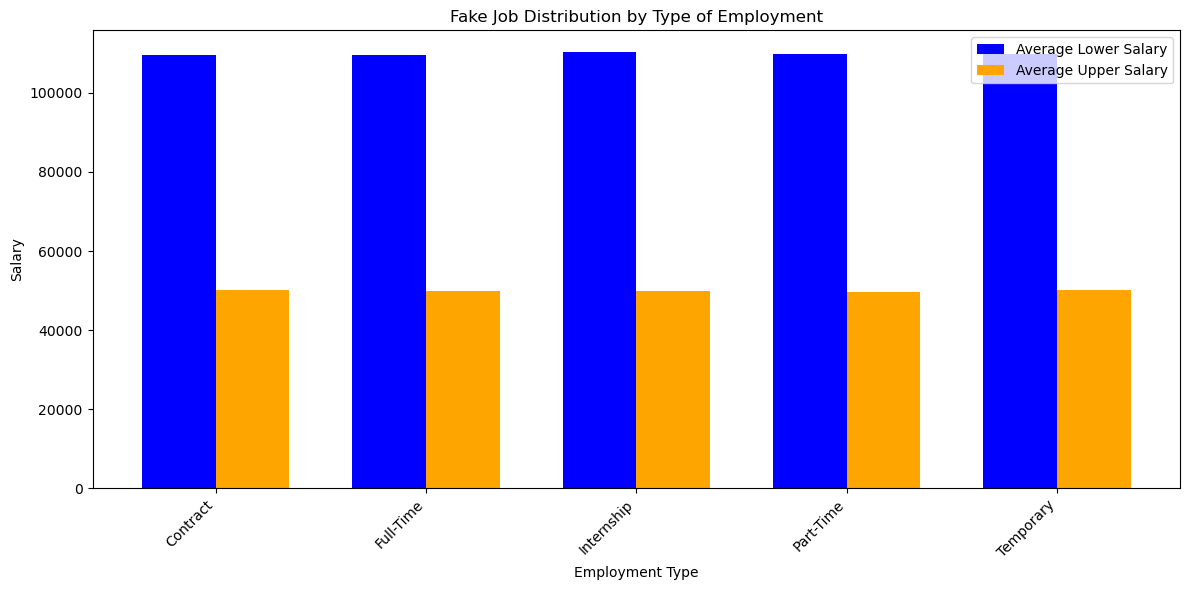

In [52]:
# Group the data by employment type and calculate the averages
fake_jobs_lower = df.groupby('employment_type')['lower_sal'].mean()
fake_jobs_upper = df.groupby('employment_type')['upper_sal'].mean()

# Create a bar plot with two bars (lower_sal and upper_sal)
fig, ax1 = plt.subplots(figsize=(12, 6))


#Plot the bars
x = range(len(fake_jobs_upper))
bar_width = 0.35
ax1.bar(x, fake_jobs_upper, width=bar_width, label='Average Lower Salary', color='blue')
ax1.bar([i + bar_width for i in x], fake_jobs_lower, width=bar_width, label='Average Upper Salary', color='orange')


# Customize the plot
ax1.set_title('Fake Job Distribution by Type of Employment')
ax1.set_xlabel('Employment Type')
ax1.set_ylabel('Salary')
ax1.set_xticks([i + bar_width / 2 for i in x])
ax1.set_xticklabels(fake_jobs_lower.index, rotation=45, ha='right')
ax1.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [53]:
fake_jobs_lower

employment_type
Contract      50130.764914
Full-Time     49932.582195
Internship    49821.382947
Part-Time     49663.997057
Temporary     50107.696146
Name: lower_sal, dtype: float64

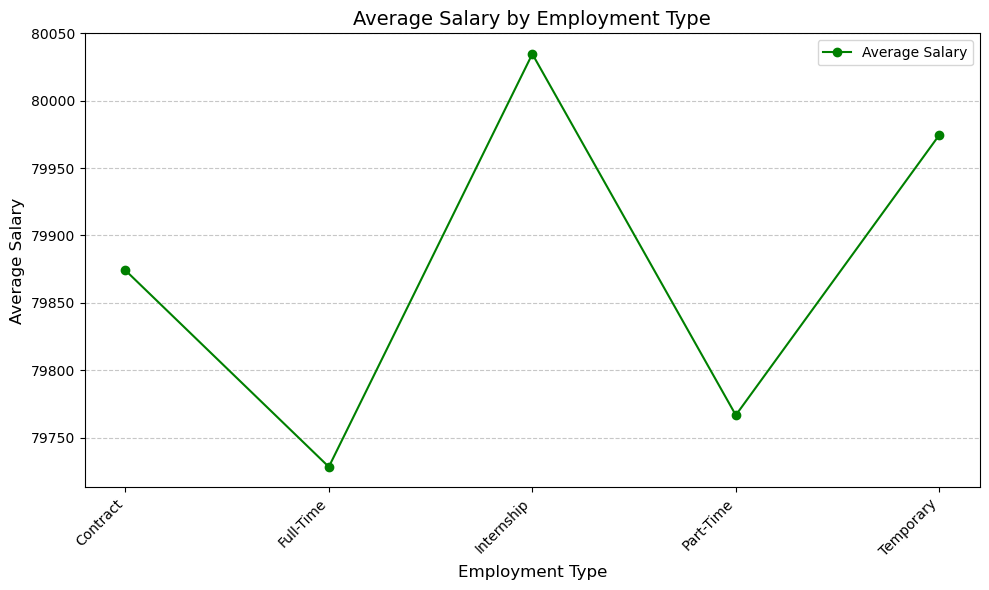

In [54]:
# Calculate the average salary for each row
df["avg_salary"] = (df["lower_sal"] + df["upper_sal"]) / 2

# Group by employment_type and calculate the average salary
average_salary_by_employment_type = df.groupby("employment_type")["avg_salary"].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_employment_type.index, 
         average_salary_by_employment_type.values, 
         marker="o", linestyle="-", color="green", label="Average Salary")

# Customize the plot
plt.title("Average Salary by Employment Type", fontsize=14)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Average Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
import random

# Function to create synthetic job postings to enable us remove bias in our data
def create_synthetic_postings(data, num_samples=10000):
    synthetic_data = []
    for _ in range(num_samples):
        # Randomly pick a real job type, location, and industry from the dataset
        random_row = data.sample(1).iloc[0]
        
        # Modify details slightly to simulate real postings
        title = random_row['title'] + " (Real)"
        description = random_row['description'].replace("Earn $5000/week!", "Competitive salary!")
        requirements = random_row['requirements'].replace("no degree required", "relevant degree required")
        company_profile = random_row['company_profile'].replace("Established", "Founded")
        location = random_row['location']
        salary_range = random_row['salary_range'].replace("5", "4")  # Adjust salary slightly
        employment_type = random_row['employment_type']
        industry = random_row['industry']
        benefits = random_row['benefits'].replace("Free", "Additional")
        fraudulent = 0  # Mark as non-fraudulent
        
        # Add to synthetic dataset
        synthetic_data.append({
            "title": title,
            "description": description,
            "requirements": requirements,
            "company_profile": company_profile,
            "location": location,
            "salary_range": salary_range,
            "employment_type": employment_type,
            "industry": industry,
            "benefits": benefits,
            "fraudulent": fraudulent
        })
    
    return pd.DataFrame(synthetic_data)

# Generate synthetic data
synthetic_data = create_synthetic_postings(df)

# Combine with original dataset to create a balanced dataset
balanced_data = pd.concat([df, synthetic_data], ignore_index=True)

# Check the new class distribution
balanced_distribution = balanced_data['fraudulent'].value_counts(normalize=True)
balanced_distribution


fraudulent
1    0.5
0    0.5
Name: proportion, dtype: float64

In [56]:
print(f'The first two rows of the balanced data:', balanced_data.head(2).T)

print(f'The first two rows of the balanced data:', balanced_data.tail(2).T)




The first two rows of the balanced data:                                                                  0  \
title                                          Mental health nurse   
description      Arm drive court sure vote. Earn $5000/week! Im...   
requirements     Basic knowledge in live, no degree required. F...   
company_profile                Rivera and Sons - Established 2022.   
location                                              West Jeffrey   
salary_range                                        $55016-$100476   
employment_type                                         Internship   
industry                                                        IT   
benefits                                                Free meals   
fraudulent                                                       1   
lower_sal                                                  55016.0   
upper_sal                                                 100476.0   
avg_salary                                       

In [57]:
# Basic summary of the balanced dataset
balanced_summary = balanced_data.describe(include='all')
balanced_summary

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent,lower_sal,upper_sal,avg_salary
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000.000000,10000.000000,10000.000000,10000.000000
unique,1278,16292,1940,16226,100,14304,5,8,7,NaN,NaN,NaN,NaN
top,Armed forces technical officer (Real),Poor able around itself source. Competitive sa...,"Basic knowledge in president, relevant degree ...",Moore Ltd - Founded 2019.,West Michael,$39084-$104294,Part-Time,Education,Sign-on bonus,NaN,NaN,NaN,NaN
freq,36,7,25,7,267,7,4057,2704,4137,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,49930.421600,109820.631500,79875.526550
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500013,11562.817589,23048.497862,12859.560402
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30005.000000,70010.000000,50613.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,39949.750000,89649.250000,69672.875000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,49825.500000,109815.500000,79879.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,59890.000000,129788.750000,89826.500000


In [58]:

# Fraudulent vs Non-Fraudulent comparison for key features
fraudulent_descriptions = balanced_data[balanced_data['fraudulent'] == 1]['description']
non_fraudulent_descriptions = balanced_data[balanced_data['fraudulent'] == 0]['description']
print(f'The first 5 Fraudulent job descriptions are as follows:\n', fraudulent_descriptions.head(5))


print(f'The first 5 Non-Fraudulent job descriptions are as follows:\n', non_fraudulent_descriptions.head(5))


The first 5 Fraudulent job descriptions are as follows:
 0    Arm drive court sure vote. Earn $5000/week! Im...
1    Government whom its bed go tax tree black. Ear...
2    I member discuss follow way there nation. Earn...
3    House across wait approach face. Earn $5000/we...
4    Case best environmental full finally leader me...
Name: description, dtype: object
The first 5 Non-Fraudulent job descriptions are as follows:
 10000    Almost treat rise. Competitive salary! Immedia...
10001    Back choice young order. Competitive salary! I...
10002    Third nor because. Competitive salary! Immedia...
10003    Candidate realize result focus whose bar least...
10004    Option majority kind address. Competitive sala...
Name: description, dtype: object


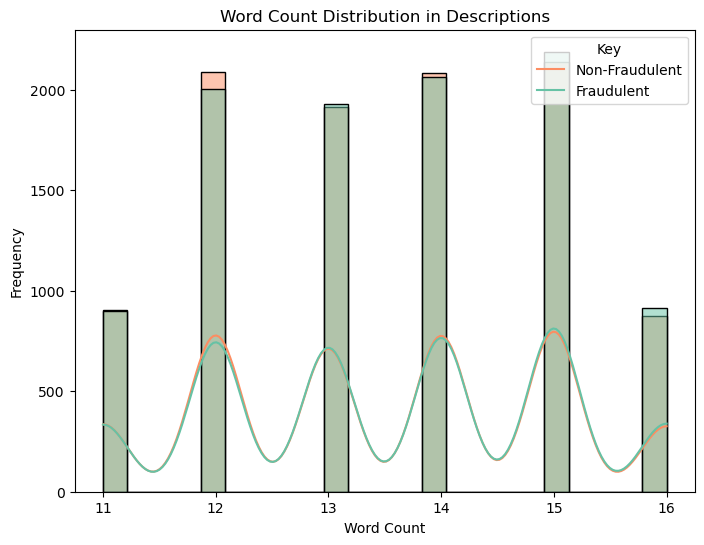

(                                        title  \
 count                                   20000   
 unique                                   1278   
 top     Armed forces technical officer (Real)   
 freq                                       36   
 mean                                      NaN   
 std                                       NaN   
 min                                       NaN   
 25%                                       NaN   
 50%                                       NaN   
 75%                                       NaN   
 max                                       NaN   
 
                                               description  \
 count                                               20000   
 unique                                              16292   
 top     Poor able around itself source. Competitive sa...   
 freq                                                    7   
 mean                                                  NaN   
 std                      

In [59]:

# Example: Word counts in descriptions for both the fraudulent and real jobs
balanced_data['description_word_count'] = balanced_data['description'].apply(lambda x: len(str(x).split()))

# Plot word count distributions for fraudulent and non-fraudulent postings
plt.figure(figsize=(8, 6))
sns.histplot(data=balanced_data, x='description_word_count', hue='fraudulent', kde=True, palette='Set2')
plt.title("Word Count Distribution in Descriptions")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title='Key', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

balanced_summary, balanced_data[['description_word_count', 'fraudulent']].groupby('fraudulent').mean()


In [60]:
balanced_data.describe()

,fraudulent,lower_sal,upper_sal,avg_salary,description_word_count
count,20000.000000,10000.000000,10000.000000,10000.000000,20000.000000
mean,0.500000,49930.421600,109820.631500,79875.526550,13.523300
std,0.500013,11562.817589,23048.497862,12859.560402,1.472741
min,0.000000,30005.000000,70010.000000,50613.000000,11.000000
25%,0.000000,39949.750000,89649.250000,69672.875000,12.000000
50%,0.500000,49825.500000,109815.500000,79879.500000,14.000000
75%,1.000000,59890.000000,129788.750000,89826.500000,15.000000
max,1.000000,69997.000000,149988.000000,109822.000000,16.000000


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Combine text columns for vectorization
balanced_data['combined_text'] = balanced_data['title'] + " " + \
                                 balanced_data['description'] + " " + \
                                 balanced_data['requirements'] + " " + \
                                 balanced_data['company_profile']

# Split data into training and testing sets
X = balanced_data['combined_text']
y = balanced_data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model building: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=230, 
                            min_samples_split=5, 
                            min_samples_leaf=1, 
                            max_features='sqrt', 
                            max_depth=None)
rf_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score is:', accuracy)

print(f'Cassification report is:\n', report)
print(f'The confusion matrix is:\n', conf_matrix)


Accuracy Score is: 1.0
Cassification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

The confusion matrix is:
 [[3000    0]
 [   0 3000]]


These scores indicate a perfect classification performance across all metrics:

1. Accuracy Score = 1.0 (100%)

This means the model correctly classified all instances


2. For both classes (0 and 1):

Precision = 1.00 (100%): All predictions made for each class were correct

Recall = 1.00 (100%): All actual instances of each class were correctly identified

F1-score = 1.00 (100%): Perfect harmony between precision and recall

Support: Each class had 3000 samples (balanced dataset)


3. Overall metrics:

Macro avg = 1.00: Perfect average performance across classes

Weighted avg = 1.00: Perfect weighted average performance

Total support = 6000 samples (3000 + 3000)


4. Confusion Matrix shows:

3000 correct predictions for class 0 (true negatives)

3000 correct predictions for class 1 (true positives)

0 false positives and false negatives

This is actually a suspiciously perfect result - in real-world applications, it's very rare to see perfect 1.0 scores across all metrics. This might indicate:

A very simple classification problem

Potential data leakage

Overfitting

Or some issue in the evaluation setup

It would be worth investigating why the model is performing with such perfect accuracy

In [62]:

from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(X_train_tfidf, y_train)

RandomForestRegressor()

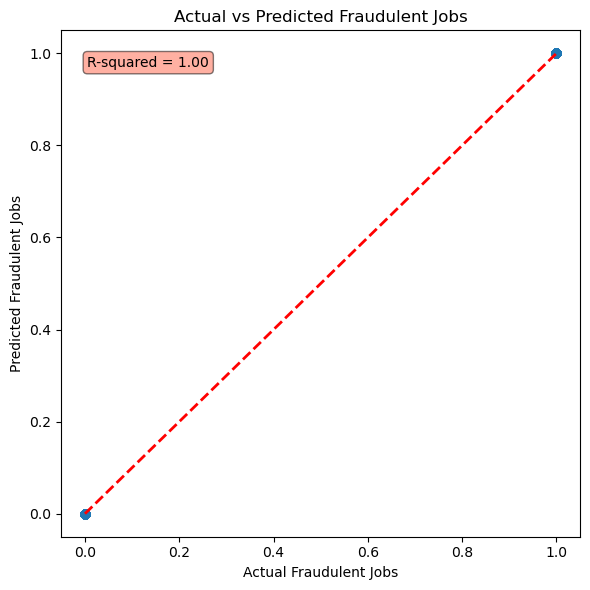

In [63]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(6, 6))
y_pred = RandomForestRegressor.predict(X_test_tfidf)  # Changed to Regressor
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Actual Fraudulent Jobs')
plt.ylabel('Predicted Fraudulent Jobs')
plt.title('Actual vs Predicted Fraudulent Jobs')

# Add a text box with R-squared value
r2 = RandomForestRegressor.score(X_test_tfidf, y_test)  # Changed to Regressor and X_test_tfidf
plt.text(0.05, 0.95, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='tomato', alpha=0.5))

plt.tight_layout()
plt.show()

In [64]:
balanced_data.describe()

,fraudulent,lower_sal,upper_sal,avg_salary,description_word_count
count,20000.000000,10000.000000,10000.000000,10000.000000,20000.000000
mean,0.500000,49930.421600,109820.631500,79875.526550,13.523300
std,0.500013,11562.817589,23048.497862,12859.560402,1.472741
min,0.000000,30005.000000,70010.000000,50613.000000,11.000000
25%,0.000000,39949.750000,89649.250000,69672.875000,12.000000
50%,0.500000,49825.500000,109815.500000,79879.500000,14.000000
75%,1.000000,59890.000000,129788.750000,89826.500000,15.000000
max,1.000000,69997.000000,149988.000000,109822.000000,16.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            10000 non-null  object 
 1   description      10000 non-null  object 
 2   requirements     10000 non-null  object 
 3   company_profile  10000 non-null  object 
 4   location         10000 non-null  object 
 5   salary_range     10000 non-null  object 
 6   employment_type  10000 non-null  object 
 7   industry         10000 non-null  object 
 8   benefits         10000 non-null  object 
 9   fraudulent       10000 non-null  int64  
 10  lower_sal        10000 non-null  float64
 11  upper_sal        10000 non-null  float64
 12  avg_salary       10000 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1015.8+ KB


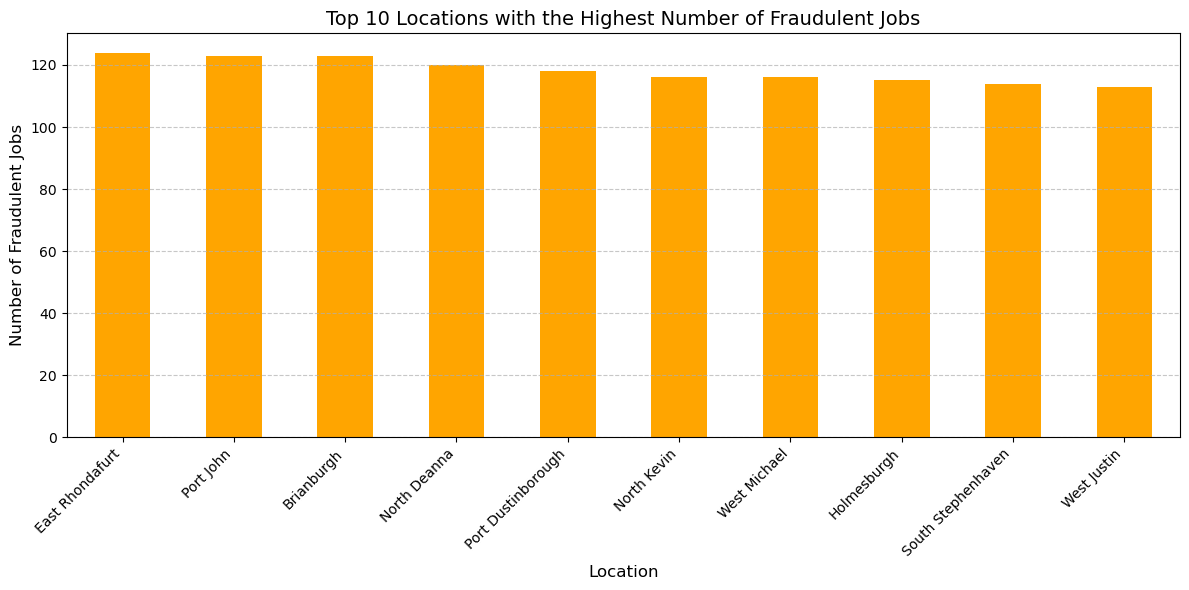

In [69]:

# Grouping the number of fraudulent jobs by location 
fraud_by_location = balanced_data[balanced_data["fraudulent"] == 1].groupby("location").size().sort_values(ascending=False)

# Select the top 10 locations with the highest number of fraudulent jobs
top_10_locations = fraud_by_location.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
top_10_locations.plot(kind="bar", color="orange")
plt.title("Top 10 Locations with the Highest Number of Fraudulent Jobs", fontsize=14)
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Fraudulent Jobs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()



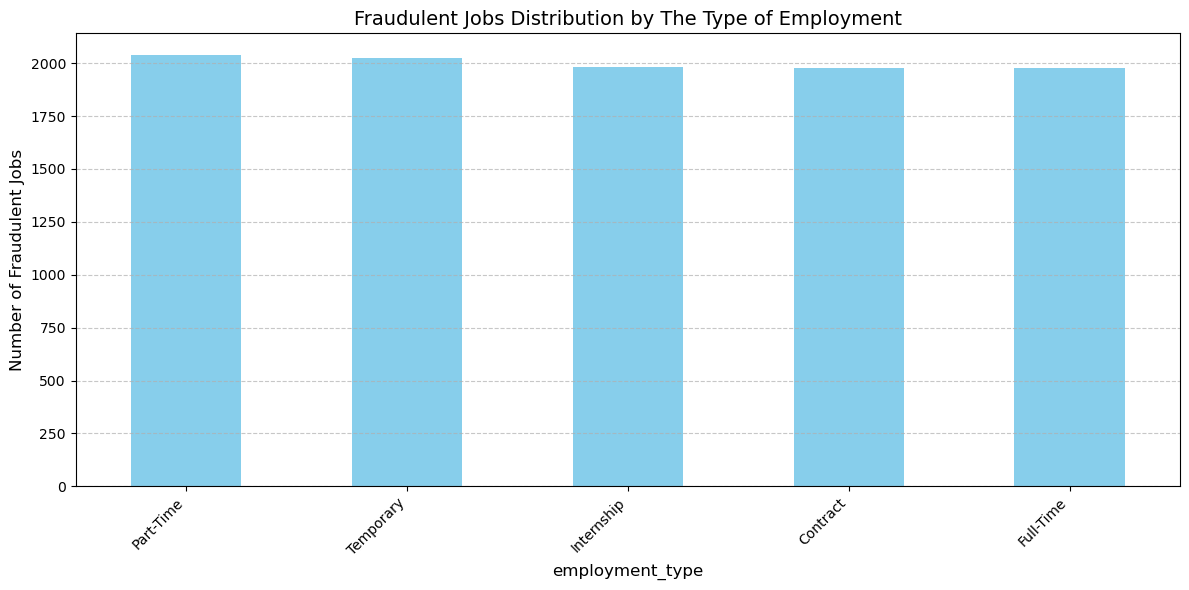

In [ ]:
# Grouping the number of fraudulent jobs by the type of Employment
fraud_by_emp_type = balanced_data[balanced_data["fraudulent"]==1].groupby("employment_type").size().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
fraud_by_emp_type.plot(kind="bar", color="skyblue")
plt.title("Fraudulent Jobs Distribution by The Type of Employment", fontsize=14)
plt.xlabel("employment_type", fontsize=12)
plt.ylabel("Number of Fraudulent Jobs", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
pd.pivot_table(
    data = balanced_data.drop(columns = ['title', 'description','requirements', 'company_profile','location', 'salary_range', 'benefits', 'combined_text']),
    values=None,
    index = 'industry',
    columns= 'employment_type',
    aggfunc= 'sum'
    )

avg_salary                                      \
employment_type       Contract   Full-Time  Internship   Part-Time   
industry                                                             
Automotive          19755299.0  19786167.5  18272301.0  20632758.5   
Education           21104726.0  20052599.0  22019208.0  21320818.0   
Finance             18157687.5  18112564.0  20915805.5  20162281.5   
Healthcare          18633851.5  19732876.5  20595201.5  20672224.5   
IT                  19470561.0  20177179.0  20250587.5  21496411.0   
Real Estate         20604824.0  17531653.5  18854337.0  19344845.5   
Retail              19911729.5  20841306.5  19132710.0  19633418.0   
Telecommunications  20352412.0  21388403.0  18588603.5  19381406.0   

                               description_word_count                       \
employment_type      Temporary               Contract Full-Time Internship   
industry                                                                     
Automotive          20803753.0                   6563      6587       5859   
Education           22212842.0                   7360      6864       7477   
Finance             20637445.0                   6061      6417       6866   
Healthcare          17538661.5                   6412      6841       7056   
IT                  19405376.0                   7176      7038       6778   
Real Estate         20380427.5                   7099      6000       6651   
Retail              21465386.0                   6876      7018       6316   
Telecommunications  19424618.0                   6868      7250       6202   

                                        ...   lower_sal              \
employment_type    Part-Time Temporary  ...    Contract   Full-Time   
industry                                ...                           
Automotive              7307      6769  ...  12351751.0  12474361.0   
Education               7033      7737  ...  13172063.0  12548416.0   
Finance                 6737      6827  ...  11351460.0  11519854.0   
Healthcare              7131      5739  ...  11661430.0  12305666.0   
IT                      7513      6857  ...  12327143.0  12835958.0   
Real Estate             6444      6793  ...  13191173.0  11045763.0   
Retail                  6357      6846  ...  12358197.0  12725970.0   
Telecommunications      6378      6363  ...  12745436.0  13260727.0   

                                                         upper_sal  \
employment_type     Internship   Part-Time   Temporary    Contract   
industry                                                             
Automotive          11363633.0  12922516.0  12845497.0  27158847.0   
Education           13549934.0  13145064.0  13870275.0  29037389.0   
Finance             13162412.0  12622730.0  13127713.0  24963915.0   
Healthcare          12945278.0  13119619.0  11021490.0  25606273.0   
IT                  12923555.0  13298223.0  12142858.0  26613979.0   
Real Estate         11714374.0  11923910.0  12716713.0  28018475.0   
Retail              11750438.0  12240240.0  13513833.0  27465262.0   
Telecommunications  11336357.0  11992588.0  12179598.0  27959388.0   

                                                                    
employment_type      Full-Time  Internship   Part-Time   Temporary  
industry                                                            
Automotive          27097974.0  25180969.0  28343001.0  28762009.0  
Education           27556782.0  30488482.0  29496572.0  30555409.0  
Finance             24705274.0  28669199.0  27701833.0  28147177.0  
Healthcare          27160087.0  28245125.0  28224830.0  24055833.0  
IT                  27518400.0  27577620.0  29694599.0  26667894.0  
Real Estate         24017544.0  25994300.0  26765781.0  28044142.0  
Retail              28956643.0  26514982.0  27026596.0  29416939.0  
Telecommunications  29516079.0  25840850.0  26770224.0  26669638.0  

[8 rows x 25 columns]

In [67]:
import pickle
# Save the model
pickle.dump(rf_model, open('fraudulentjob_model.pkl', 'wb'))

# Save the TF-IDF vectorizer
pickle.dump(tfidf, open('tfidf_vectorizer.pkl', 'wb'))

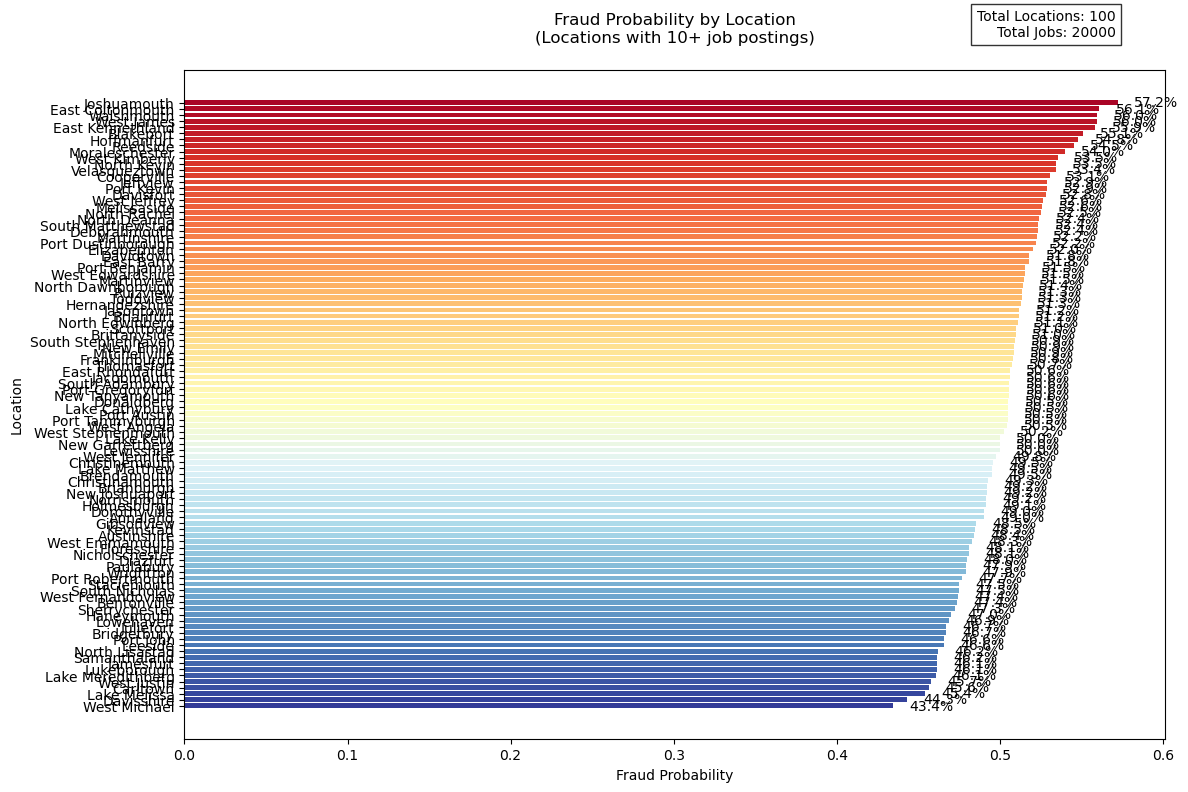

In [68]:
# Calculate fraud probability by location
location_fraud_analysis = balanced_data.groupby('location')['fraudulent'].agg(['count', 'mean'])
location_fraud_analysis = location_fraud_analysis.sort_values('mean', ascending=True)  # Sort by fraud probability

# Filter for locations with more than a minimum number of jobs (e.g., 10) to avoid outliers
min_jobs = 10
location_fraud_analysis = location_fraud_analysis[location_fraud_analysis['count'] >= min_jobs]

# Create the visualization
plt.figure(figsize=(12, 8))
bars = plt.barh(y=location_fraud_analysis.index, 
                width=location_fraud_analysis['mean'],
                color=sns.color_palette("RdYlBu_r", len(location_fraud_analysis)))

# Add percentage labels on the bars
for i, v in enumerate(location_fraud_analysis['mean']):
    plt.text(v + 0.01, i, f'{v:.1%}', va='center')

# Customize the plot
plt.title('Fraud Probability by Location\n(Locations with 10+ job postings)', pad=20)
plt.xlabel('Fraud Probability')
plt.ylabel('Location')

# Add a text box with total number of locations and jobs
total_locations = len(location_fraud_analysis)
total_jobs = location_fraud_analysis['count'].sum()
plt.text(0.95, 1.05, 
         f'Total Locations: {total_locations}\nTotal Jobs: {total_jobs}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8),
         ha='right')

plt.tight_layout()
plt.show()